In [1]:
!git clone https://github.com/saisriteja/cervical_cancer.git 

Cloning into 'cervical_cancer'...
remote: Enumerating objects: 22, done.
remote: Total 22 (delta 0), reused 0 (delta 0), pack-reused 22
Unpacking objects: 100% (22/22), done.


In [0]:
def getdata(name):
  pickle_in = open(name,"rb")
  X = pickle.load(pickle_in)
  return X

In [0]:
import pickle
type1=getdata('/content/cervical_cancer/smear dataset/normal_superficiel.pickle')
type2=getdata('/content/cervical_cancer/smear dataset/normal_intermediate.pickle')
type3=getdata('/content/cervical_cancer/smear dataset/normal_columnar.pickle')
type4=getdata('/content/cervical_cancer/smear dataset/light_dysplastic.pickle')
type5=getdata('/content/cervical_cancer/smear dataset/moderate_dysplastic.pickle')
type6=getdata('/content/cervical_cancer/smear dataset/severe_dysplastic.pickle')
type7=getdata('/content/cervical_cancer/smear dataset/carcinoma_in_situ.pickle')

In [0]:
import cv2

In [0]:
normal = [type1,type2,type3]
abnormal = [type4,type5,type6,type7]

complete_data = []

dim = (512,512)

for type_id in normal:
  for img in type_id:
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    complete_data.append([img,0])
for type_id in abnormal:
  for img in type_id:
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    complete_data.append([img,1])

In [0]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
%matplotlib inline

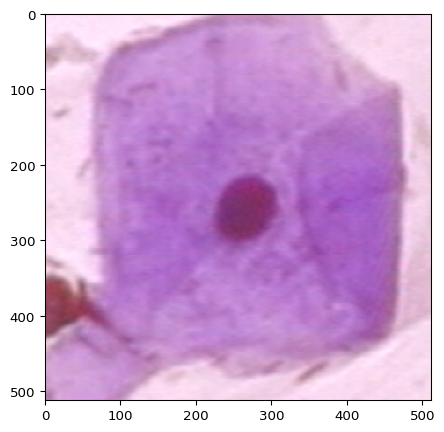

In [12]:
image = complete_data[1][0]
ia.imshow(image)

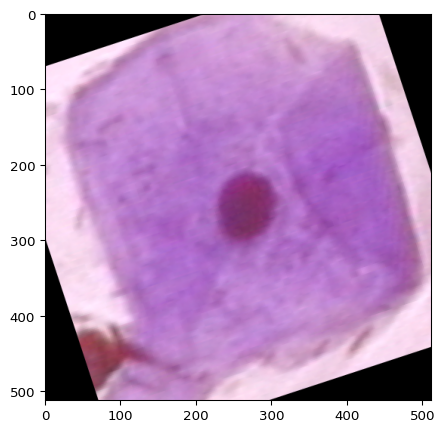

In [13]:
rotate=iaa.Affine(rotate=(-50, 30))
rotated_image=rotate.augment_image(image)
ia.imshow(rotated_image)

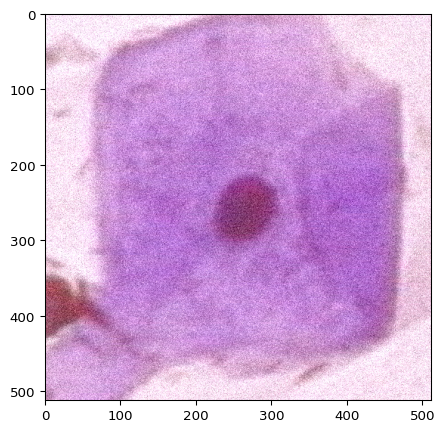

In [14]:
gaussian_noise=iaa.AdditiveGaussianNoise(10,20)
noise_image=gaussian_noise.augment_image(image)
ia.imshow(noise_image)

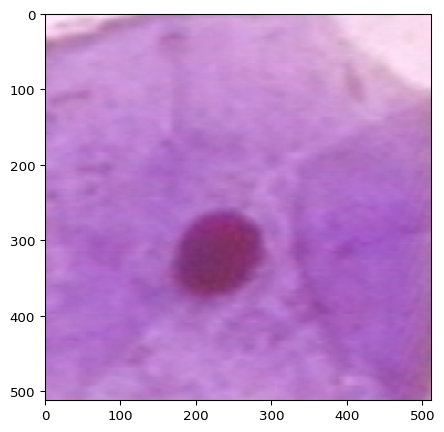

In [15]:
crop = iaa.Crop(percent=(0, 0.3)) # crop image
corp_image=crop.augment_image(image)
ia.imshow(corp_image)

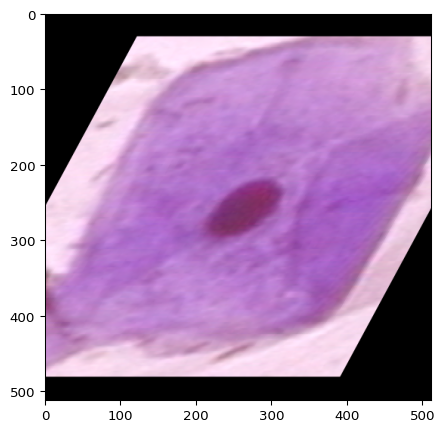

In [16]:
shear = iaa.Affine(shear=(0,40))
shear_image=shear.augment_image(image)
ia.imshow(shear_image)

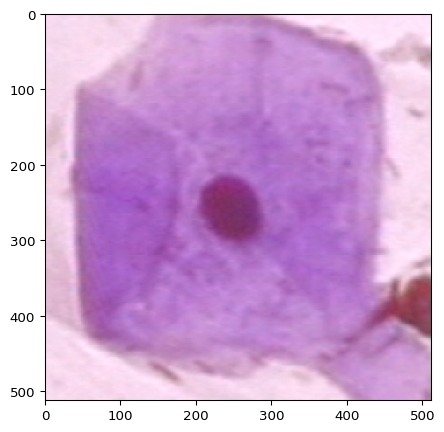

In [17]:
#flipping image horizontally
flip_hr=iaa.Fliplr(p=1.0)
flip_hr_image= flip_hr.augment_image(image)
ia.imshow(flip_hr_image)

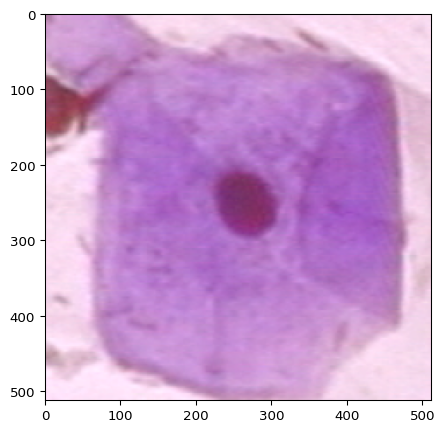

In [18]:
flip_vr=iaa.Flipud(p=1.0)
flip_vr_image= flip_vr.augment_image(image)
ia.imshow(flip_vr_image)

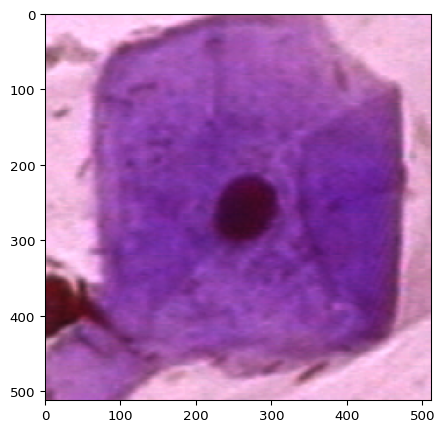

In [19]:
contrast=iaa.GammaContrast(gamma=2.0)
contrast_image =contrast.augment_image(image)
ia.imshow(contrast_image)

In [0]:
import os

In [0]:
n = []
abn = []
for type_id in normal:
  for img in type_id:
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    n.append(img)
for type_id in abnormal:
  for img in type_id:
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    abn.append(img)

In [22]:
len(n),len(abn)

(242, 675)

In [0]:
os.mkdir('/content/training')
os.chdir('/content/training')
os.mkdir('normal')
os.mkdir('abnormal')

In [0]:
for no,img in enumerate(n): cv2.imwrite('/content/training/normal/'+str(no)+'.jpg',img)
for no,img in enumerate(abn): cv2.imwrite('/content/training/abnormal/'+str(no)+'.jpg',img)

In [28]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Using TensorFlow backend.


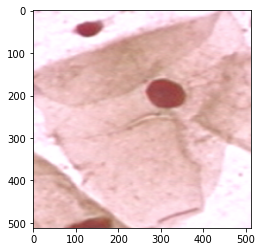

In [30]:
import matplotlib.pyplot as plt
plt.imshow(n[0])

In [0]:
#img = n[0]  # this is a PIL image
x = np.array(n[0])  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/training', save_prefix='normal', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [0]:
from glob import glob
files = glob('/content/training/*.jpeg')

images = []
for i in files:
  img = cv2.imread(i)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.array(img)
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  images.append(img)

In [49]:
images = np.array(images)
images.shape

(21, 512, 512, 3)

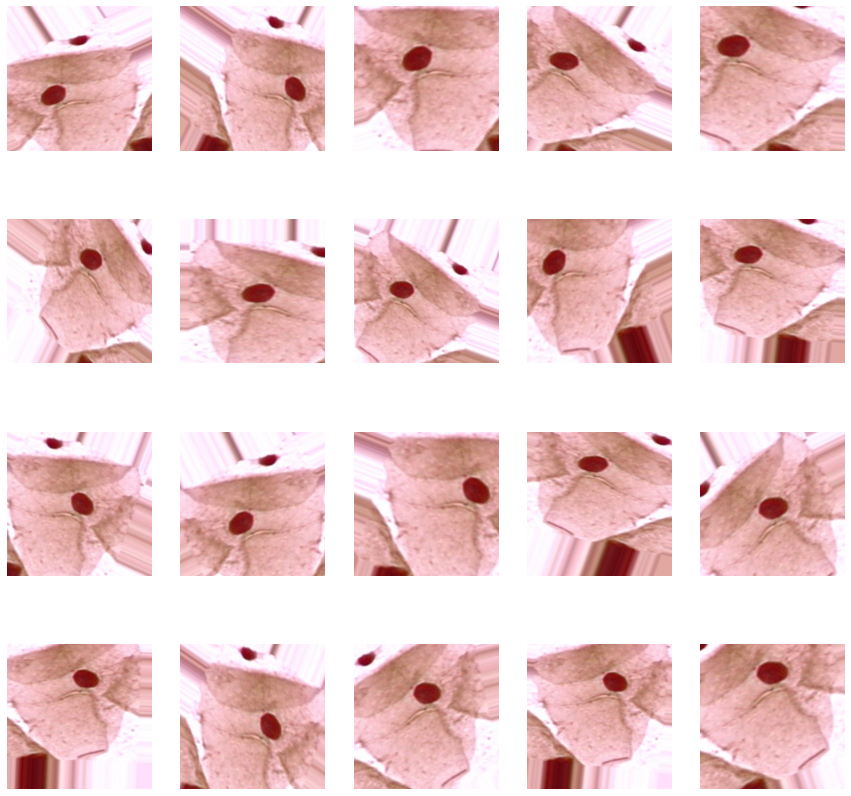

In [50]:
f, axarr = plt.subplots(4,5,figsize=(15,15))

no = 0
for i in range(4):
  for j in range(5):
    axarr[i,j].imshow(images[no],)
    no = no +1
    axarr[i,j].axis('off')
